In [5]:
import numpy as np
import matplotlib.pyplot as plt

from board import Board, Pos, CompleteMove, BOARD_SIZE, make_cm, make_move, make

In [6]:
def draw_board(board: Board, print_info: bool = True):
    from string import ascii_lowercase
    board.info()
    print(board.get_nbs())
    board_np = np.zeros((BOARD_SIZE, BOARD_SIZE, 3), dtype=int)
    for i in range(BOARD_SIZE):
        for j in range(BOARD_SIZE):
            if board[i, j].is_empty():
                board_np[i, j, :] = np.array([255, 255, 255], dtype=int)
            elif board[i, j].is_player():
                board_np[i, j, :] = np.array([255, 0, 0], dtype=int) if board[i, j].player_id == 0 else np.array([0, 0, 255], dtype=int)
            elif board[i, j].is_trace():
                board_np[i, j, :] = np.array([180, 60, 60], dtype=int) if board[i, j].player_id == 0 else np.array([60, 100, 180], dtype=int)
            elif board[i, j].is_shot():
                board_np[i, j, :] = np.array([120, 120, 120], dtype=int)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    _ticks = np.linspace(0.5, BOARD_SIZE-0.5, BOARD_SIZE)
    plt.imshow(board_np)
    plt.plot([1.5, 9.5, 9.5, 1.5, 1.5], [1.5, 1.5, 9.5, 9.5, 1.5], '-ok')
    plt.plot([4], [3], 'or')
    plt.plot([7], [8], 'ob')
    ax.set_yticks(_ticks)
    ax.set_xticks(_ticks)
    ax.tick_params(
        axis='both',
        which='both',
        labelbottom=False,
        labelleft=False)
    ax.grid(which='both')
    for i in range(BOARD_SIZE):
        ax.text(i, BOARD_SIZE+0.5, ascii_lowercase[i], style='italic')
    for i in range(BOARD_SIZE):
        ax.text(-1, BOARD_SIZE - i - 1, (str(i) if i < 10 else ascii_lowercase[i-10]), style='italic')
    plt.show()


In [ ]:
b = Board()

In [ ]:
b.set_state_from_ngd('f7/g5 i3/h5, g6/h4 j4/h6, f5/g7 j3/i5, f4/g2 i2/g3, f3/h2 j1/k3, f2/g4 k1/i0, e3/d1 k2/i1, e4/d2 l3/k5, e5/d3 k4/l2, f6/d5 j5/l6, e7/c6 i6/k7, f8/h7 j7/i9, g8/i7 i8/g9, f9/h8 j9/hb, ga/e9 ja/h9, fb/ha k9/ia, ea/gb k8/la, d9/fa l8/ka, c9/bb l7/j6, ca/eb k6/j8, b9/cb r.')

In [ ]:
b.execute_complete_move(make('e7/f5'))
# b.execute_complete_move(make('h4/g6'))
# b.execute_complete_move(make('e6/g5'))
# b.execute_complete_move(make('g3/e4'))
# b.execute_complete_move(make('d5/f4'))
# b.execute_complete_move(make('g4/e5'))
# b.execute_complete_move(make('d4/f3'))
# b.execute_complete_move(make('h5/f6'))

In [ ]:
draw_board(b)

# Playing against the algo

## PickBest

In [ ]:
from engine import PickBest

In [ ]:
board = Board()
algo = PickBest(player_id=1, board=board)

In [ ]:
board.execute_complete_move(make('b9/cb'))

In [ ]:
algo.make_best_move()

In [ ]:
draw_board(board)

# Reviewing a game

In [7]:
from board import GameReplay

In [8]:
gr = GameReplay(
    ngd='f7/g5 i3/h5, g6/h4 j4/h6, f5/g7 j3/i5, f4/g2 i2/g3, f3/h2 j1/k3, f2/g4 k1/i0, e3/d1 k2/i1, e4/d2 l3/k5, e5/d3 k4/l2, f6/d5 j5/l6, e7/c6 i6/k7, f8/h7 j7/i9, g8/i7 i8/g9, f9/h8 j9/hb, ga/e9 ja/h9, fb/ha k9/ia, ea/gb k8/la, d9/fa l8/ka, c9/bb l7/j6, ca/eb k6/j8, b9/cb r.'
)

Loaded 41 moves


moves played: 41
player #1 moves: 0
dscr: f7/g5 i3/h5, g6/h4 j4/h6, f5/g7 j3/i5, f4/g2 i2/g3, f3/h2 j1/k3, f2/g4 k1/i0, e3/d1 k2/i1, e4/d2 l3/k5, e5/d3 k4/l2, f6/d5 j5/l6, e7/c6 i6/k7, f8/h7 j7/i9, g8/i7 i8/g9, f9/h8 j9/hb, ga/e9 ja/h9, fb/ha k9/ia, ea/gb k8/la, d9/fa l8/ka, c9/bb l7/j6, ca/eb k6/j8, b9/cb r.
eval: 1.15
1xx1xTxx4/2T1TxTxxtxx/1PTTxTxxxtt1/4TTTxtxtt/4TTxxxtxt/2x2TTxtxpx/3xTTxxxtx1/4TTxx1tt1/3xTTxtttxt/3x1Txxt1tx/3x4xtt1/8x3 b R


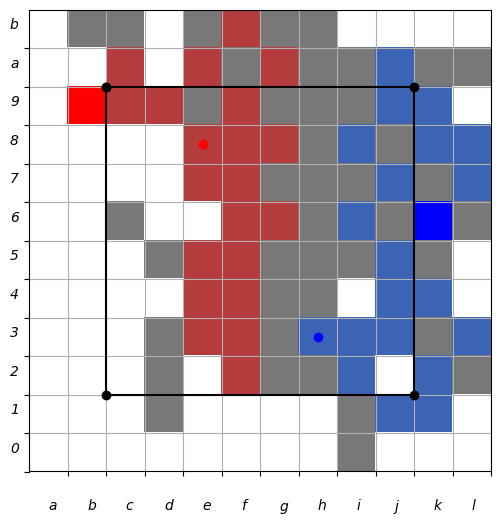

In [49]:
gr.play()
draw_board(gr.b)